In [106]:
import numpy as np
from numpy import array
import pandas as pd
from pickle import dump, load
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


### Loading Data

In [71]:
# load doc into memory
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# load text
raw_text = load_doc('/home/hasan/DATA SET/character dataset/text_file.txt')
print(raw_text)


Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.
When the pie was opened
The birds began to sing;
Wasn ' t that a dainty dish,
To set before the king.
The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.
The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose.



### clean text

In [72]:
tokens = raw_text.split()
raw_text = ' '.join(tokens)

In [73]:
raw_text

"Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn ' t that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose."

### Creating Sequence

In [74]:
# organize into sequences of characters
length = 10
sequences = list()
for i in range(length, len(raw_text)):
    # select sequence of tokens
    seq = raw_text[i-length:i+1]
    sequences.append(seq)
print('Total Sequences: %d ' % len(sequences))
print('\n\n', sequences)

Total Sequences: 401 


 ['Sing a song', 'ing a song ', 'ng a song o', 'g a song of', ' a song of ', 'a song of s', ' song of si', 'song of six', 'ong of sixp', 'ng of sixpe', 'g of sixpen', ' of sixpenc', 'of sixpence', 'f sixpence,', ' sixpence, ', 'sixpence, A', 'ixpence, A ', 'xpence, A p', 'pence, A po', 'ence, A poc', 'nce, A pock', 'ce, A pocke', 'e, A pocket', ', A pocket ', ' A pocket f', 'A pocket fu', ' pocket ful', 'pocket full', 'ocket full ', 'cket full o', 'ket full of', 'et full of ', 't full of r', ' full of ry', 'full of rye', 'ull of rye.', 'll of rye. ', 'l of rye. F', ' of rye. Fo', 'of rye. Fou', 'f rye. Four', ' rye. Four ', 'rye. Four a', 'ye. Four an', 'e. Four and', '. Four and ', ' Four and t', 'Four and tw', 'our and twe', 'ur and twen', 'r and twent', ' and twenty', 'and twenty ', 'nd twenty b', 'd twenty bl', ' twenty bla', 'twenty blac', 'wenty black', 'enty blackb', 'nty blackbi', 'ty blackbir', 'y blackbird', ' blackbirds', 'blackbirds,', 'lackbirds, ',

### Save Sequence

In [75]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n' .join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# save sequences to file
out_filename = '/home/hasan/DATA SET/character dataset/char_sequences.txt'
save_doc(sequences, out_filename)

### Train Language Model

In [76]:
# load
in_filename = '/home/hasan/DATA SET/character dataset/char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')

In [77]:
lines

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

### Encode Sequence

In [78]:
chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))

In [79]:
mapping

{'\n': 0,
 ' ': 1,
 "'": 2,
 ',': 3,
 '.': 4,
 ';': 5,
 'A': 6,
 'B': 7,
 'C': 8,
 'E': 9,
 'F': 10,
 'H': 11,
 'S': 12,
 'T': 13,
 'W': 14,
 'a': 15,
 'b': 16,
 'c': 17,
 'd': 18,
 'e': 19,
 'f': 20,
 'g': 21,
 'h': 22,
 'i': 23,
 'k': 24,
 'l': 25,
 'm': 26,
 'n': 27,
 'o': 28,
 'p': 29,
 'q': 30,
 'r': 31,
 's': 32,
 't': 33,
 'u': 34,
 'w': 35,
 'x': 36,
 'y': 37}

In [80]:
# save the mapping
dump(mapping, open('mapping.pkl', 'wb'))

### Character to Numeric Vector

In [81]:
sequences = list()
for line in lines:
    # integer encode line
    encoded_seq = [mapping[char] for char in line]
    # store
    sequences.append(encoded_seq)

In [82]:
sequences

[[12, 23, 27, 21, 1, 15, 1, 32, 28, 27, 21],
 [23, 27, 21, 1, 15, 1, 32, 28, 27, 21, 1],
 [27, 21, 1, 15, 1, 32, 28, 27, 21, 1, 28],
 [21, 1, 15, 1, 32, 28, 27, 21, 1, 28, 20],
 [1, 15, 1, 32, 28, 27, 21, 1, 28, 20, 1],
 [15, 1, 32, 28, 27, 21, 1, 28, 20, 1, 32],
 [1, 32, 28, 27, 21, 1, 28, 20, 1, 32, 23],
 [32, 28, 27, 21, 1, 28, 20, 1, 32, 23, 36],
 [28, 27, 21, 1, 28, 20, 1, 32, 23, 36, 29],
 [27, 21, 1, 28, 20, 1, 32, 23, 36, 29, 19],
 [21, 1, 28, 20, 1, 32, 23, 36, 29, 19, 27],
 [1, 28, 20, 1, 32, 23, 36, 29, 19, 27, 17],
 [28, 20, 1, 32, 23, 36, 29, 19, 27, 17, 19],
 [20, 1, 32, 23, 36, 29, 19, 27, 17, 19, 3],
 [1, 32, 23, 36, 29, 19, 27, 17, 19, 3, 1],
 [32, 23, 36, 29, 19, 27, 17, 19, 3, 1, 6],
 [23, 36, 29, 19, 27, 17, 19, 3, 1, 6, 1],
 [36, 29, 19, 27, 17, 19, 3, 1, 6, 1, 29],
 [29, 19, 27, 17, 19, 3, 1, 6, 1, 29, 28],
 [19, 27, 17, 19, 3, 1, 6, 1, 29, 28, 17],
 [27, 17, 19, 3, 1, 6, 1, 29, 28, 17, 24],
 [17, 19, 3, 1, 6, 1, 29, 28, 17, 24, 19],
 [19, 3, 1, 6, 1, 29, 28, 17, 

In [83]:
type(sequences)

list

### size of Vocabulary

In [84]:
# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38


### Split Input and Output

In [85]:
sequences = array(sequences)
#sequences = pd.DataFrame(sequences)
X, y = sequences[:,:-1], sequences[:,-1]

In [86]:
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size)

### Model

In [88]:
# define the model
model = Sequential()
model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(vocab_size, activation= 'softmax'))


In [89]:
# summarize defined model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 75)                34200     
_________________________________________________________________
dense_2 (Dense)              (None, 38)                2888      
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________


In [90]:
# compile model
model.compile(loss= 'categorical_crossentropy', 
              optimizer= 'adam',
              metrics=['accuracy'])

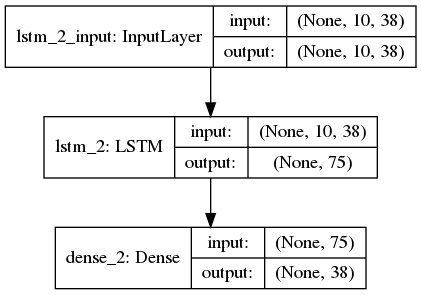

In [92]:
plot_model(model, to_file= 'model.png' , show_shapes=True)

In [93]:
# fit model
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 2s - loss: 3.6077 - accuracy: 0.1347
Epoch 2/100
 - 0s - loss: 3.4713 - accuracy: 0.1920
Epoch 3/100
 - 0s - loss: 3.1293 - accuracy: 0.1945
Epoch 4/100
 - 0s - loss: 3.0478 - accuracy: 0.1945
Epoch 5/100
 - 0s - loss: 3.0023 - accuracy: 0.1945
Epoch 6/100
 - 0s - loss: 2.9751 - accuracy: 0.1945
Epoch 7/100
 - 0s - loss: 2.9594 - accuracy: 0.1945
Epoch 8/100
 - 0s - loss: 2.9432 - accuracy: 0.1945
Epoch 9/100
 - 0s - loss: 2.9239 - accuracy: 0.1945
Epoch 10/100
 - 0s - loss: 2.9109 - accuracy: 0.2020
Epoch 11/100
 - 0s - loss: 2.8826 - accuracy: 0.1945
Epoch 12/100
 - 0s - loss: 2.8552 - accuracy: 0.1970
Epoch 13/100
 - 0s - loss: 2.8345 - accuracy: 0.2070
Epoch 14/100
 - 0s - loss: 2.8093 - accuracy: 0.2244
Epoch 15/100
 - 0s - loss: 2.7911 - accuracy: 0.1995
Epoch 16/100
 - 0s - loss: 2.7683 - accuracy: 0.2145
Epoch 17/100
 - 0s - loss: 2.7236 - accuracy: 0.2244
Epoch 18/100
 - 0s - loss: 2.6892 - accuracy: 0.2544
Epoch 19/100
 - 0s - loss: 2.6463 - accuracy: 0.2269
Ep

In [94]:
# save the model to file
model.save('model.h5')

### Generate text data

In [112]:
# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
    in_text = seed_text
    # generate a fixed number of characters
    for _ in range(n_chars):
        # encode the characters as integers
        encoded = [mapping[char] for char in in_text]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # one hot encode
        encoded = to_categorical(encoded, num_classes=len(mapping))
        encoded = encoded.reshape(1, encoded.shape[1], encoded.shape[2])
        # predict character
        yhat = model.predict_classes(encoded, verbose=0)
        # reverse map integer to character
        out_char = ''
        for char, index in mapping.items():
            if index == yhat:
                out_char = char
                break
        # append to input
        in_text += out_char
    return in_text

In [113]:
# load the model
model = load_model('model.h5')
# load the mapping
mapping = load(open('mapping.pkl', 'rb'))

In [115]:
# test start of rhyme
print(generate_seq(model, mapping, 10, 'Sing a son', 20))
# test mid-line
print(generate_seq(model, mapping, 10, 'king was i', 5))
# test not in original
print(generate_seq(model, mapping, 10, 'hello worl', 20))


Sing a song of sixpence, A poc
king was in his
hello worls he a ntofse. ho he
